In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings(action = 'ignore')

In [31]:
df = pd.read_csv('../Data/CleanedData.csv')

In [32]:
df = pd.get_dummies(df)

In [33]:
df.head()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,Average,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,...,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,0,3.0,71.0,71.0,74.0,72.000000,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,1,0.0,69.0,90.0,88.0,82.333333,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
2,2,4.0,87.0,93.0,91.0,90.333333,1,0,0,1,...,0,0,1,0,1,0,1,0,1,0
3,3,1.0,45.0,56.0,42.0,47.666667,0,1,1,0,...,1,0,0,1,0,0,1,1,0,0
4,4,0.0,76.0,78.0,75.0,76.333333,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0


In [34]:
x = df.drop(columns = ['Unnamed: 0', 'MathScore', 'ReadingScore', 'WritingScore', 'Average'], axis = 1)
y = df[['Average']]

In [35]:
x.head()

,NrSiblings,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_associate's degree,ParentEduc_bachelor's degree,...,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,3.0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
1,0.0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
2,4.0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,1.0,0,1,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
4,0.0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0


In [36]:
y.head()

,Average
0,72.000000
1,82.333333
2,90.333333
3,47.666667
4,76.333333


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5, train_size = 0.75)

In [38]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [39]:
x_train = pd.DataFrame(data = sc.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(data = sc.transform(x_test), columns = x_test.columns)

In [44]:
def eveluate_model(y_true, y_pred):
    
    sns.set()
    plt.figure(figsize = (9, 9))
    plt.scatter(x = y_true, y = y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    
    mae = mean_absolute_error(y_true = y_true, y_pred = y_pred)
    mse = mean_squared_error(y_true = y_true, y_pred = y_pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_true = y_true, y_pred = y_pred)
    return mae, rmse, r2_square

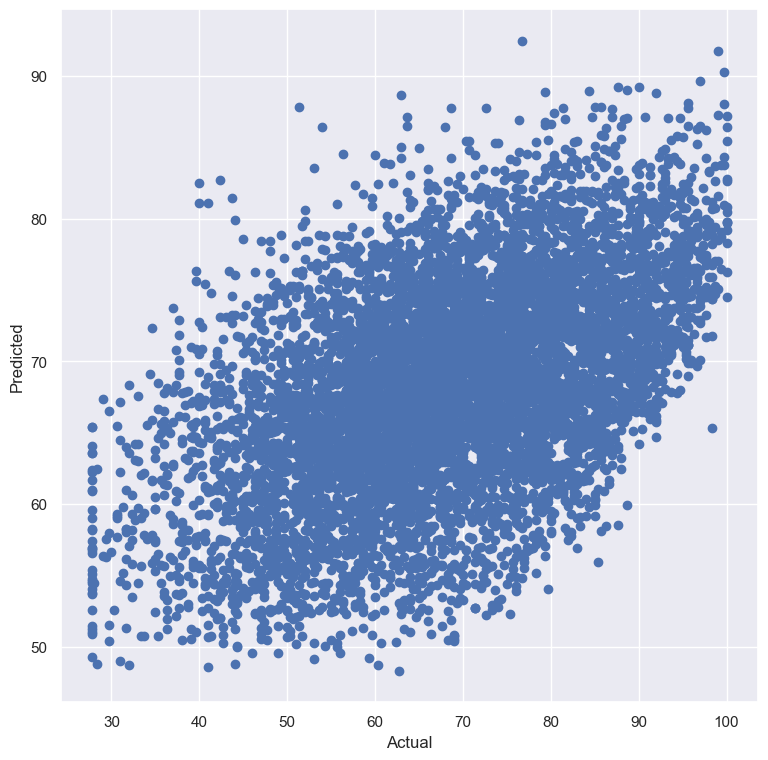

LinearRegression
Model testing performance 
RMSE =  12.549828298119754
MAE =  10.212092646214678
R2 score =  25.24531437561458




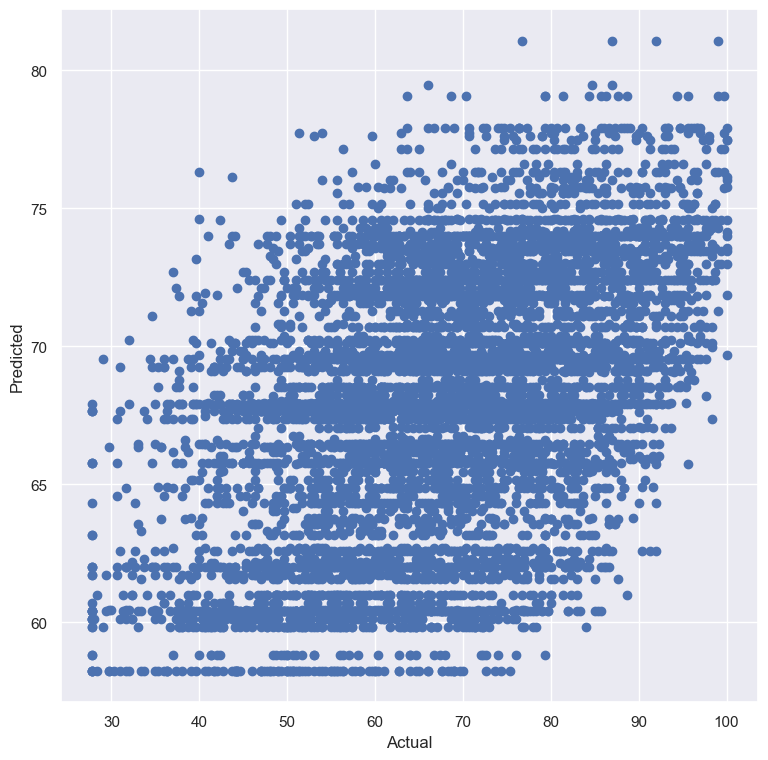

Lasso
Model testing performance 
RMSE =  12.993684844385314
MAE =  10.599773063242951
R2 score =  19.86402794525597




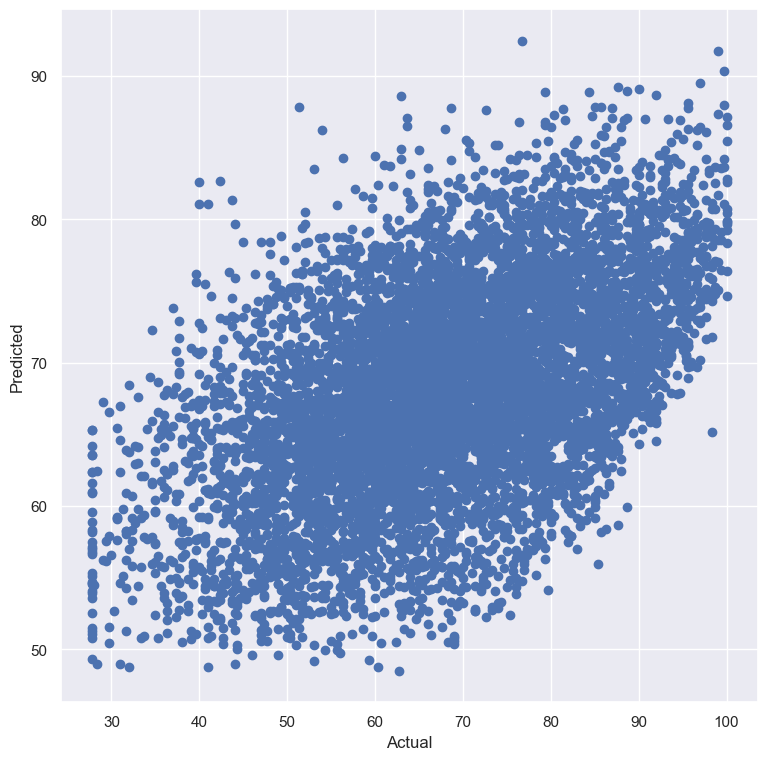

Ridge
Model testing performance 
RMSE =  12.54832578140754
MAE =  10.211539072644012
R2 score =  25.26321317679092




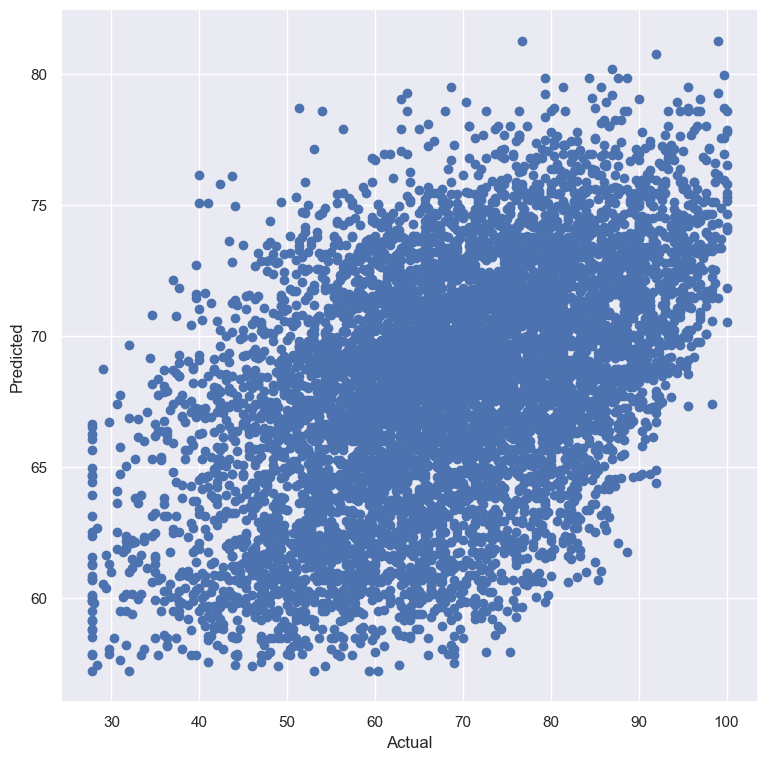

Elacticnet
Model testing performance 
RMSE =  12.904534302557169
MAE =  10.53271017424777
R2 score =  20.95989214629065




In [45]:
models = {
    'LinearRegression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Elacticnet' : ElasticNet()
}

trained_model_list = []
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    mae, rmse, r2_squar = eveluate_model(y_test, y_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model testing performance ")
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("R2 score = ", r2_squar * 100)
    
    r2_list.append(r2_squar)
    
    print("=" * 50)
    print("\n")